In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.insert(0, '/home/duncan/sara-socket-client/Scripts/')
import Interpolate2D as Interp2d
import geomdl

In [5]:
data = np.genfromtxt('/home/duncan/Downloads/sent_to_cornell/59824_TiCrO_20F47.csv',
                     delimiter=',',skip_header=1)

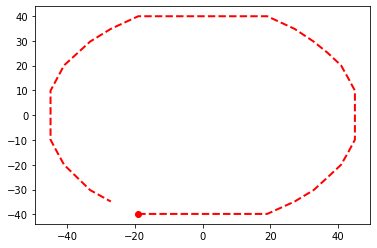

[0.4173607843137255 0.378155636740364 0.19942022649215682
 0.08140196099305554 0.03960382230441176 0.03157039215686275
 0.03649506116199998 0.07512291781617644 0.192913911245
 0.37473560493343694 0.7243596361 0.8974631669467789 0.9562650183339998
 0.9341876750700278 0.9491039706176468 0.872492782579365
 0.6854226182096077 0.435278431372549 0.17395795515607848
 0.111156862745098 0.17341296042803922 0.4502 0.7498464392207284
 0.8416694677871148 0.7346542007042016]
[0.4106318386931839 0.3747352433769195 0.19946986628719224
 0.08082384699977764 0.039581993665945205 0.03189970077108824
 0.03651966447071409 0.07469816336375291 0.19193584683853437
 0.37187648599766415 0.7252970905020681 0.9002147503218125
 0.9563380927232896 0.929964796822274 0.9492002438320248
 0.8772239936646719 0.6857210836686751 0.4349849474286725
 0.1727799161252825 0.11092961115150222 0.17220448319420512
 0.4501236193568223 0.7505644851714983 0.8421553262921626
 0.7350573284694509]
[0.40317912399800965 0.374322733983649

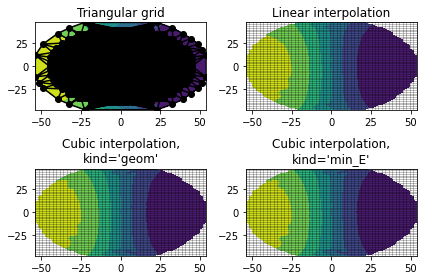

In [6]:
x = data[:,9]
y = data[:,10]
xy = [[x[i],y[i]] for i in range(len(x))]
Ti_cont = data[:,7]
SampledPoints =  [[0.00000000,    0.00000000],
   [0.00000000,   40.00000000],
   [15.30733729,   36.95518130],
   [28.28427125,   28.28427125],
   [36.95518130,   15.30733729],
   [40.00000000,   -0.00000000],
   [36.95518130,   -15.30733729],
   [28.28427125,   -28.28427125],
   [15.30733729,   -36.95518130],
   [-0.00000000,   -40.00000000],
  [-15.30733729,   -36.95518130],
  [-28.28427125,   -28.28427125],
 [-36.95518130,   -15.30733729],
  [-40.00000000,    0.00000000],
  [-36.95518130,   15.30733729],
  [-28.28427125,   28.28427125],
  [-15.30733729,   36.95518130],
   [0.00000000,   20.00000000],
   [14.14213562,   14.14213562],
   [20.00000000,   -0.00000000],
   [14.14213562,   -14.14213562],
   [-0.00000000,   -20.00000000],
  [-14.14213562,   -14.14213562],
  [-20.00000000,    0.00000000],
  [-14.14213562,   14.14213562]]
values = Interp2d.interpolate2d(points_in=xy, values_in=Ti_cont, fpt=SampledPoints, method='Triangular Grid', scaling=1.2, plot=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

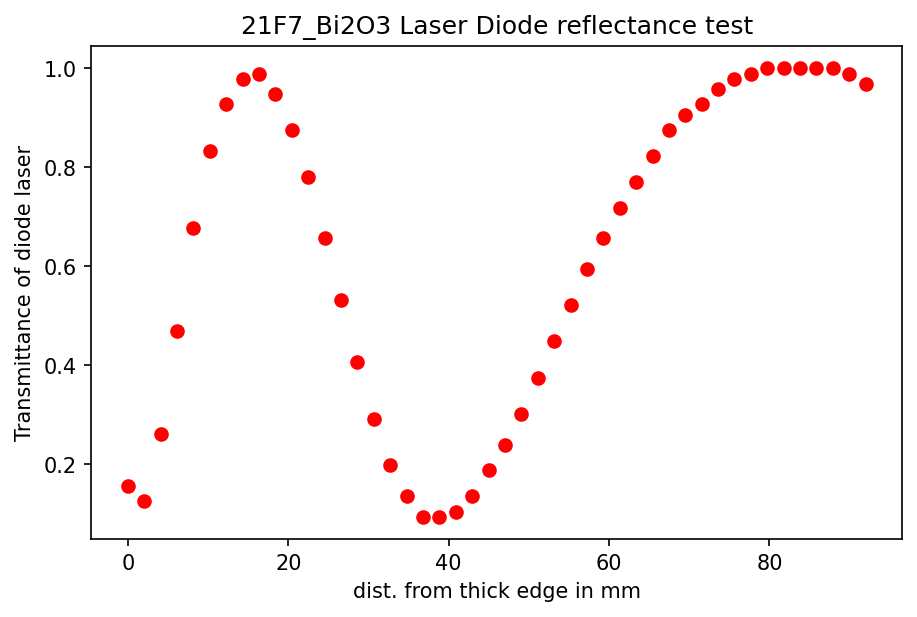

In [7]:
#distance from Thick edge mm
x = np.linspace(0,92,46)
r = np.array([
    .15, .12, .25, .45, .65,
    .80, .89, .94, .95, .91,
    .84, .75, .63, .51,
    .39, .28, .19, .13, .09,
    .09, .10, .13, .18, .23,
    .29, .36, .43, .50, .57,
    .63, .69, .74, .79, .84,
    .87, .89, .92, .94, .95,
    .96, .96, .96, .96, .96,
    .95, .93
])/0.96
# silicon with 20 nm SiO2 was on average at 0.96 which makes sense

fig, ax = plt.subplots(dpi=150,constrained_layout=True)
ax.scatter(x, r, c='r')
ax.set_xlabel('dist. from thick edge in mm')
ax.set_ylabel('Transmittance of diode laser')
ax.set_title('21F7_Bi2O3 Laser Diode reflectance test')
plt.show()

In [2]:
import imageio as io
from SARA_cornell_funcs import *
import json

In [ ]:
# (imgdict['scan_6']['b-10_-16_+01800_+0420']['center'])
# fig,ax = plt.subplot(dpi=150)
print(list(imgdict))
for scan in sorted(list(imgdict)):
    centers = []
    for key in list(imgdict[scan]):
        centers.append(imgdict[scan][key]['center'])
    print(f'{scan} center is {np.average(centers)}')

In [3]:
with open("/home/duncan/Documents/a-Si_wafer-8/GradsAndCenters.json", "r") as infile:
    imgdict = json.load(infile)

In [ ]:
len(list(imgdict['scan_3']))

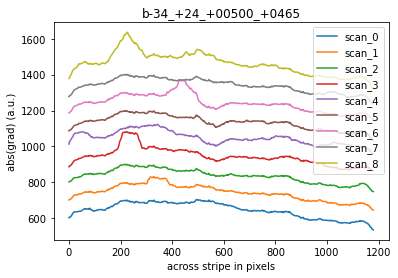

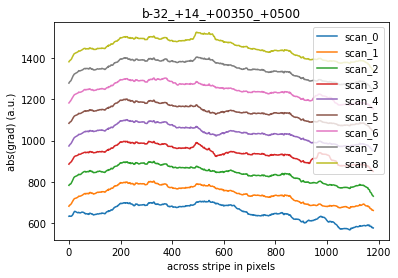

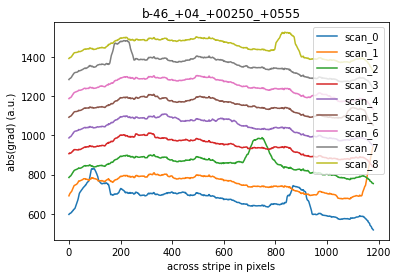

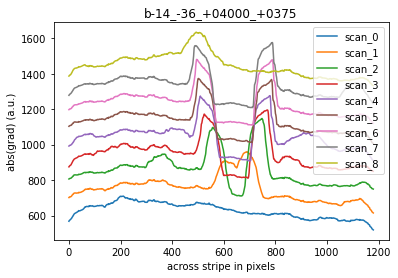

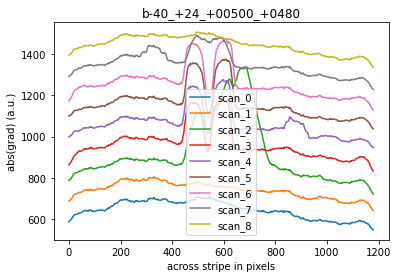

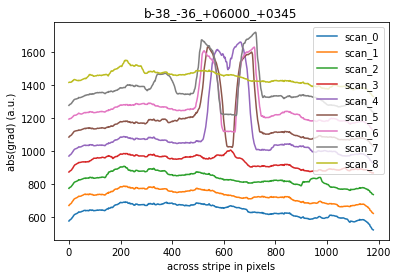

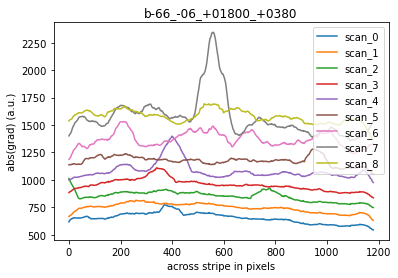

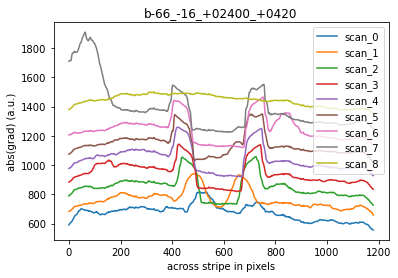

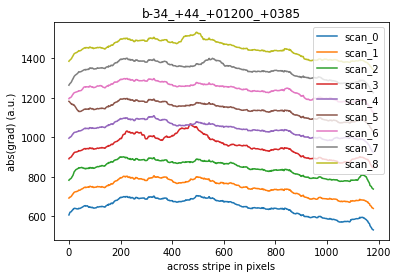

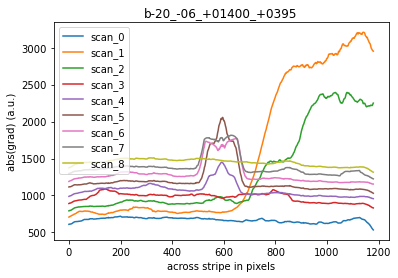

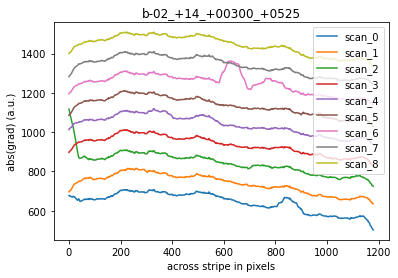

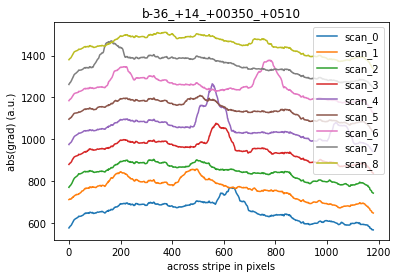

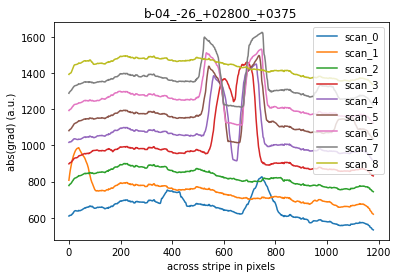

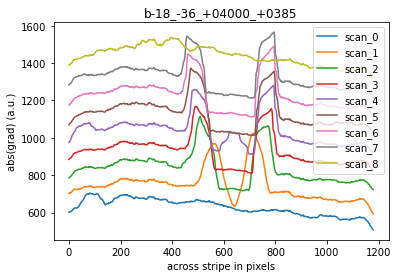

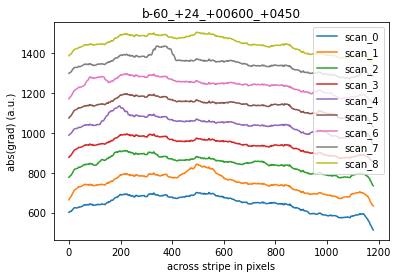

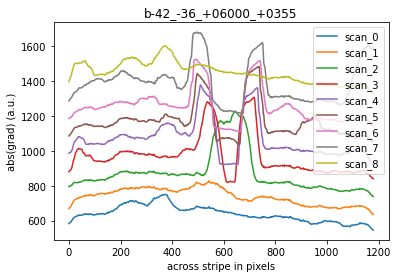

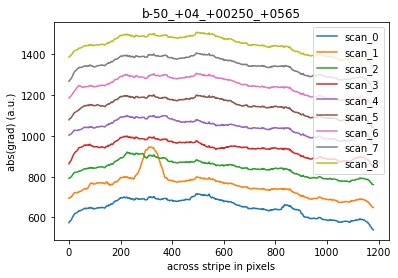

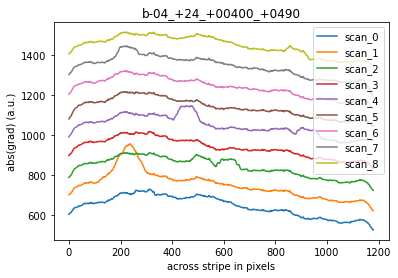

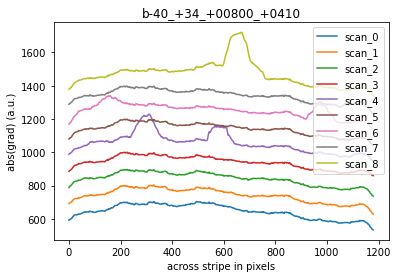

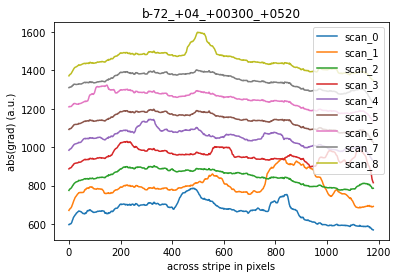

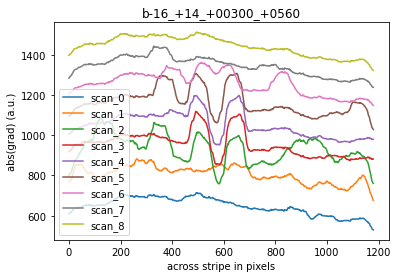

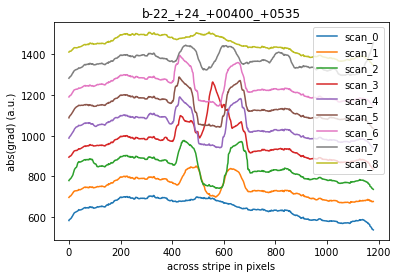

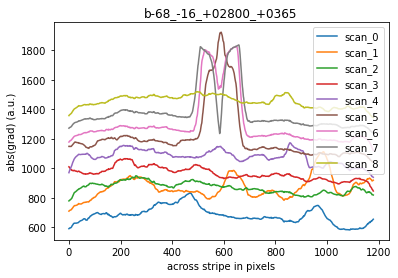

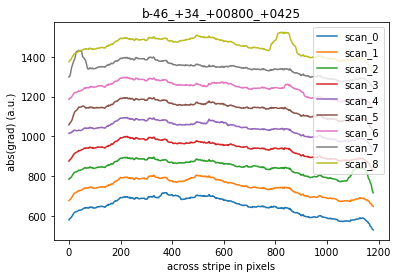

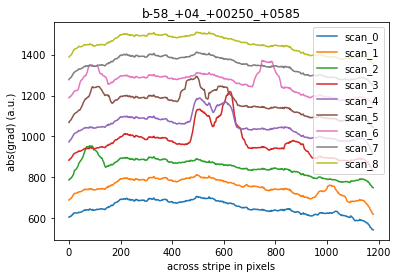

In [5]:
for key in list(imgdict['scan_0'])[-25:]:
    fig,ax = plt.subplots()
    for idx,scan in enumerate(sorted(list(imgdict))):
        grad = smooth(np.array(imgdict[scan][key]['grad'])[50:-50]+100*idx,75,'flat')
        center = imgdict[scan][key]['center']
        
        ax.plot(grad,label=scan)
        
    ax.set_title(key)
    ax.set_xlabel('across stripe in pixels')
    ax.set_ylabel('abs(grad) (a.u.)')
    plt.legend()
    plt.show(fig)
    plt.close(fig)
    

In [ ]:
allkeys = []
for scan in list(imgdict):
    for key in list(imgdict[scan]):
        allkeys.append(key)

# Bezier curve fitting of reflectance

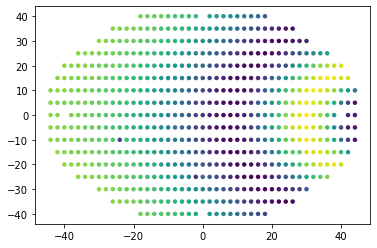

In [4]:
data = np.genfromtxt('/home/duncan/Downloads/reflectance_map.csv',delimiter=',')
x = data[:,0]
y = data[:,1]
diodevolt = data[:,2]
err = data[:,3]
# print(points)
plt.scatter(x,y,12,diodevolt)

In [ ]:
# plt.scatter(x,y,12,diodevolt)
from scipy.interpolate import LSQBivariateSpline as BSV
# import scipy.interpolate.interp2d as interp
data = np.genfromtxt('/home/duncan/Documents/Data/21F7_Bi2O3/reflectance_map_1.csv',delimiter=',')
x = data[:,0]
y = data[:,1]
diodevolt = data[:,2]
xs = np.linspace(-30,30,5)
ys = np.linspace(-30,30,5)
# print(xs,ys)
xrad, yrad = np.meshgrid(xs,ys)
# print(xrad,yrad)
knotsx = xrad.copy()
knotsy = yrad.copy()

# knotsx[0] += .0001
# knotsx[-1] -= .0001
# knotsy[0] += .0001
# knotsy[-1] -= .0001
bsv = BSV(x,y,diodevolt,knotsx.ravel(),knotsy.ravel())


In [ ]:
sys.path.insert(0,'/home/duncan/sara-socket-client/')

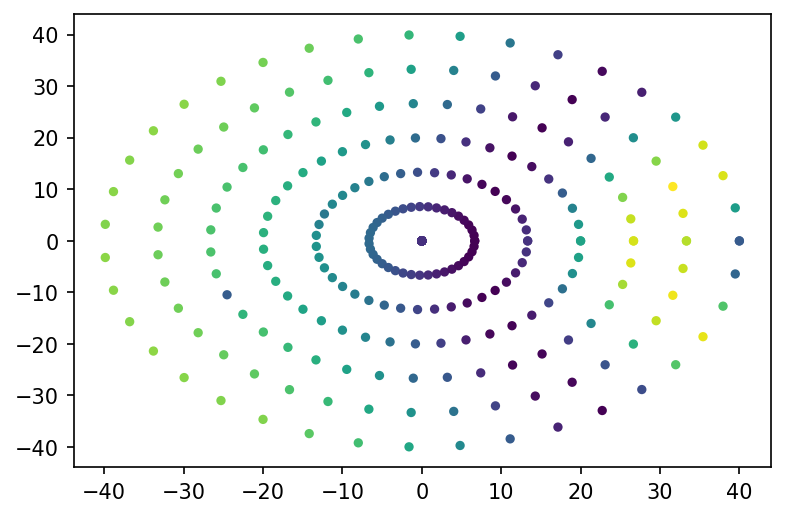

In [17]:
import Interpolate2D
RMtup = RadialWaferMesh(r_nodes=7,theta_nodes=40)
radialmesh = Interpolate2D.interpolate2d(points_in=list(zip(x,y)),fpt=RMtup,values_in=diodevolt,scaling=1.2, method='geom',plot=False)
xr,yr = RadialWaferMesh(r_nodes=7,theta_nodes=40,tup=False)
fig,ax = plt.subplots(dpi=150)
ax.scatter(xr,yr,12,radialmesh)


In [ ]:
from geomdl import construct
from geomdl import fitting
from geomdl.visualization import VisMPL as vis


# Data set
# points = ((-5, -5, 0), (-2.5, -5, 0), (0, -5, 0), (2.5, -5, 0), (5, -5, 0), (7.5, -5, 0), (10, -5, 0),
#           (-5, 0, 3), (-2.5, 0, 3), (0, 0, 3), (2.5, 0, 3), (5, 0, 3), (7.5, 0, 3), (10, 0, 3),
#           (-5, 5, 0), (-2.5, 5, 0), (0, 5, 0), (2.5, 5, 0), (5, 5, 0), (7.5, 5, 0), (10, 5, 0),
#           (-5, 7.5, -3), (-2.5, 7.5, -3), (0, 7.5, -3), (2.5, 7.5, -3), (5, 7.5, -3), (7.5, 7.5, -3), (10, 7.5, -3),
#           (-5, 10, 0), (-2.5, 10, 0), (0, 10, 0), (2.5, 10, 0), (5, 10, 0), (7.5, 10, 0), (10, 10, 0))
points = list(zip(x,y,diodevolt))
size_u = 12
size_v = 27
degree_u = 2
degree_v = 5
# surf.ctrlpts2d = ctrl_pnts
# Do global surface approximation
surf = fitting.interpolate_surface(points, size_u, size_v, degree_u, degree_v,centripital=True)
# surf = fitting.approximate_surface(points, size_u, size_v, degree_u, degree_v, ctrlpts_size_u=3, ctrlpts_size_v=4)

# Extract curves from the approximated surface
surf_curves = construct.extract_curves(surf)
plot_extras = [
    dict(
        points=surf_curves['u'][0].evalpts,
        name="u",
        color="cyan",
        size=5
    ),
    dict(
        points=surf_curves['v'][0].evalpts,
        name="v",
        color="magenta",
        size=5
    )
]

# Plot the interpolated surface
# surf.delta = 0.05
# surf.vis = vis.VisSurface()
# surf.render()

# # Visualize data and evaluated points together
# import numpy as np
# import matplotlib.pyplot as plt
evalpts = np.array(surf.evalpts)
pts = np.array(points)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(evalpts[:, 0], evalpts[:, 1], evalpts[:, 2])
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], color="red")
plt.show()
plt.savefig('/home/duncan/Desktop/BezierSurface_u-12_V-27_udim-2_vdim-5.png')

In [16]:
def RadialWaferMesh(r_nodes=3, theta_nodes=13, r_max=40,tup=True):
    """generate a radial mesh for the wafer"""
    r = np.linspace(0,r_max,r_nodes)
    theta = np.linspace(0,2*np.pi,theta_nodes)
    R,Theta = np.meshgrid(r,theta)
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)
    x = X.ravel()
    y = Y.ravel()
    if tup:
        return list(zip(x,y))
    else:
        return x, y

In [ ]:
xy = RadialWaferMesh()
ctrl_pnts = []
for x_point, y_point in RadialWaferMesh():
    ctrl_pnts.append((x_point,y_point,0.5))
# list(zip(xy,0.5*np.ones(len(xy)),1.0*np.ones(len(xy))))

In [9]:
# np.unique([-12:]))
condsonly = []
for key in list(imgdict['scan_6']):
    condsonly.append(key[-12:])


In [ ]:
fig,ax = plt.subplots()
ax.scatter(x,y,12,diodevolt)

In [13]:
np.unique(condsonly)

array(['+00250_+0545', '+00250_+0550', '+00250_+0555', '+00250_+0560',
       '+00250_+0565', '+00250_+0570', '+00250_+0575', '+00250_+0580',
       '+00250_+0585', '+00250_+0590', '+00250_+0595', '+00250_+0600',
       '+00250_+0605', '+00250_+0610', '+00300_+0515', '+00300_+0520',
       '+00300_+0525', '+00300_+0530', '+00300_+0535', '+00300_+0540',
       '+00300_+0545', '+00300_+0550', '+00300_+0555', '+00300_+0560',
       '+00300_+0565', '+00300_+0570', '+00300_+0575', '+00300_+0580',
       '+00300_+0585', '+00300_+0590', '+00350_+0495', '+00350_+0500',
       '+00350_+0505', '+00350_+0510', '+00350_+0515', '+00350_+0520',
       '+00350_+0525', '+00350_+0530', '+00350_+0535', '+00350_+0540',
       '+00350_+0545', '+00350_+0550', '+00350_+0555', '+00350_+0560',
       '+00350_+0565', '+00350_+0570', '+00400_+0465', '+00400_+0470',
       '+00400_+0475', '+00400_+0480', '+00400_+0485', '+00400_+0490',
       '+00400_+0495', '+00400_+0500', '+00400_+0505', '+00400_+0510',
      